In [15]:
#决策树
# 你是否玩过二十个问题的游戏，游戏的规则很简单：参与游戏的一方在脑海里想某个事物，其他参与者向他提问题，只允许提20个问题，
# 问题的答案也只能用对或错回答。问问题的人通过推断分解，逐步缩小待猜测事物的范围。或者是酒桌上的猜数游戏，游戏规则有点类似，
# 参与游戏的一方在脑海里想一个固定的数值，需要在固定的范围内，其他参与者进行猜测，他会先给出猜测的正确与否，如果正确直接喝酒，
# 如果错误，就在下一个参与者开始之前给出新的猜数范围，逐步缩小待猜测事物的范围。

# 决策树的工作原理与上面两个游戏类似，用户输入一系列数据，然后给出游戏的答案。
# 我们经常使用决策树处理分类问题，近来的调查表明决策树也是最经常使用的数据挖掘算法。
# 它之所以如此流行，一个很重要的原因就是不需要了解机器学习的知识，就能搞明白决策树是如何工作的。

# 那么如何从一堆原始数据中构造决策树呢？别着急，过程如下：

# 首先讨论构造决策树的方法，以及如何编写构造树的Python代码；
# 接着提出一些度量算法成功率的方法；
# 最后使用递归建立分类器，并且使用Matplotlib绘制决策树图。

# 决策树
# 优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。
# 缺点：可能会产生过度匹配问题。
# 适用数据类型：数值型和标称型。

# 决策树的一般流程
# (1) 收集数据：可以使用任何方法。
# (2) 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化。
# (3) 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期。
# (4) 训练算法：构造树的数据结构。
# (5) 测试算法：使用经验树计算错误率。
# (6) 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。

# 决策树学习的算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割，使得对各个子数据集有一个最好的分类的过程。
# 这一过程对应着对特征空间的划分，也对应着决策树的构建。开始，构建根结点，将所有训练数据都放在根结点。
# 选择一个最优特征，按照这一特征将训练数据集分割成子集，使得各个子集有一个在当前条件下最好的分类。
# 如果这些子集已经能够被基本正确分类，那么构建叶结点，并将这些子集分到所对应的叶结点中去，
# 如果还有子集不能被基本正确分类，那么就对这些子集选择新的最优特征，继续对其进行分割，构建相应的结点。
# 如此递归地进行下去，直至所有训练数据子集被基本正确分类，或者没有合适的特征为止。
# 最后每个子集都被分到叶结点上，即都有了明确的类。这就生成了一棵决策树。


# 从上述过程中就可以看出，决策树的生成是一个递归过程。在决策树基本算法中，有三种情形会导致递归返回
# 当前结点包含的样本全属于同一类别，无需划分
# 当前属性集为空，或是所有样本在所有属性上取值相同，无法划分
# 当前结点包含的样本集合为空，不能划分
# 在第二种情形下，我们把当前结点标记为叶结点，并将其类别设定为该结点所含样本最多的类别。
# 在第三种情形下，同样把当前结点标记为叶结点，但将其类别设定为其父结点所含样本最多的类别。
# 这两种情形的处理实质不同：第二种情况是在利用当前结点的后验分布，而第三种情况则是把父结点的样本分布作为当前结点的先验分布


# 以上方法生成的决策树可能对训练数据有很好的分类能力，但对未知的测试数据却未必有很好的分类能力，即可能发生过拟合现象。
# 我们需要对已生成的树自下而上进行剪枝，将树变得更简单，从而使它具有更好的泛化能力。
# 具体地，就是去掉过于细分的叶结点，使其回退到父结点，甚至更高的结点，然后将父结点或更高的结点改为新的叶结点。
# 如果特征数量很多，也可以在决策树学习开始的时候，对特征进行选择，只留下对训练数据有足够分类能力的特征

# 可以看出，决策树学习算法包含特征选择、决策树的生成与决策树的剪枝过程。
# 由于决策树表示一个条件概率分布，所以深浅不同的决策树对应着不同复杂度的概率模型。
# 决策树的生成对应于模型的局部选择，决策树的剪枝对应于模型的全局选择。
# 决策树的生成只考虑局部最优，相对地，决策树的剪枝则考虑全局最优。

# 决策树模型呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。
# 它可以认为是if-then规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。
# 分类树具有良好的可读性与分类速度快的优点。分类树在学习时，利用训练数据，根据损失函数最小化的原则建立分类树模型，
# 在预测时，对新的数据，利用分类树模型进行分类。决策树学习通常包括3个步骤：特征选择、决策树的生成和决策树的修剪

# 可以将决策树看成一个if-then规则的集合：由决策树的根结点到叶结点的每一条路径构建一条规则，
# 路径上内部结点的特征对应着规则的条件，而叶结点的类对应着规则的结论。
# 决策树的路径或其对应的if-then规则集合具有一个重要的性质——互斥并且完备。
# 这就是说，每一个实例都被一条路径或一条规则所覆盖，而且只被一条路径或一条规则所覆盖。
# 这里所谓覆盖是指实例的特征与路径上的特征一致或实例满足规则的条件

# 决策树还表示给定特征条件下类的条件概率分布。这一条件概率分布定义在特征空间的一个划分上。
# 将特征空间划分为互不相交的单元或区域，并在每个单元定义一个类的概率分布就构成了一个条件概率分布。
# 决策树的一条路径对应于划分中的一个单元。决策树所表示的条件概率分布由各个单元给定条件下类的条件概率分布组成。
# 假设XX为表示特征的随机变量，YY为表示类的随机变量，那么这个条件概率分布可以表示为P（Y∣X）P（Y∣X）。
# XX取值于给定划分下单元的集合，YY取值于类的集合。各叶结点（单元）上的条件概率往往偏向某一个类，即属于某一类的概率较大。
# 决策树分类时将该结点的实例强行分到条件概率大的那一类去
#决策树的预测准确性一般比回归和分类方法弱，但可以通过用集成学习方法组合大量决策树，显著提升树的预测效果



In [2]:
# 决策树要如何构建呢？
# 通常，这一过程可以概括为3个步骤：特征选择、决策树的生成和决策树的修剪

# 特征选择在于选取对训练数据具有分类能力的特征，这样可以提高决策树学习的效率；
# 如果利用一个特征进行分类的结果与随机分类的结果没有很大差别，则称这个特征是没有分类能力的。
# 经验上扔掉这样的特征对决策树学习的精度影响不大。

# 通常特征选择的标准是信息增益(information gain)或信息增益比，为了简单，本文章使用信息增益作为选择特征的标准。
# 那么，什么是信息增益？
# 在继续讲解之前，先看一组实例，贷款申请样本数据表

# ID	年龄	有工作	有自己的房子	信贷情况	类别(是否个给贷款)
# 1	青年	否	否	一般	否
# 2	青年	否	否	好	否
# 3	青年	是	否	好	是

# 希望通过所给的训练数据学习一个贷款申请的决策树，用以对未来的贷款申请进行分类，
# 即当新的客户提出贷款申请时，根据申请人的特征利用决策树决定是否批准贷款申请。

# 特征选择就是决定用哪个特征来划分特征空间。
# 比如，我们通过上述数据表得到两个可能的决策树，分别由两个不同特征的根结点构成 年龄 工作

# 现在我们想要决定选择第一个特征还是第二个特征，但是问题是：究竟选择哪个特征更好些？
# 这就要求确定选择特征的准则。直观上，如果一个特征具有更好的分类能力，或者说，按照这一特征将训练数据集分割成子集，
# 使得各个子集在当前条件下有最好的分类，那么就更应该选择这个特征。
# 信息增益就能够很好地表示这一直观的准则。那么什么是信息增益呢？

# 在划分数据集之前之后信息发生的变化成为信息增益，知道如何计算信息增益，
# 我们就可以计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择。
# 在可以评测哪种数据划分方式是最好的数据划分之前，我们必须学习如何计算 信息增益。
# 集合信息的度量方式称为 香农熵 或者简称为 熵，这个名字来源于信息论之父克劳德·香农
#在信息论与概率统计中，熵（entropy）是表示随机变量不确定性的度量 熵大表示不确定性大 反之则小
# 一般地，熵H(Y)H(Y)与条件熵H(Y∣X)H(Y∣X)之差称为互信息（mutual information）。
# 决策树学习中的信息增益等价于训练数据集中类与特征的互信息。
# 决策树学习应用信息增益准则选择特征。给定训练数据集DD和特征a∗a 
# 经验熵H(D)H(D)表示对数据集DD进行分类的不确定性。而经验条件熵H(D∣a∗)H(D∣a )表示在特征a∗a 
# 给定的条件下对数据集DD进行分类的不确定性。那么它们的差，即信息增益，就表示由于特征a∗a 
# 而使得对数据集DD的分类的不确定性减少的程度。显然，对于数据集DD而言，信息增益依赖于特征，
# 不同的特征往往具有不同的信息增益，信息增益大的特征具有更强的分类能力
# 根据信息增益准则的特征选择方法：对训练数据集（或子集）DD，
# 计算其每个特征的信息增益，并比较它们的大小，选择信息增益最大的特征。

# 下面就可以准备编写代码来进行验证，在这之前，先对数据集进行属性标注并计算经验熵

# 年龄：0代表青年，1代表中年，2代表老年；
# 有工作：0代表否，1代表是；
# 有自己的房子：0代表否，1代表是；
# 信贷情况：0代表一般，1代表好，2代表非常好；
# 类别(是否给贷款)：no代表否，yes代表是





In [3]:
from math import log

"""
Parameters:
    无
Returns:
    dataSet - 数据集
    labels - 分类属性
"""
# 函数说明:创建测试数据集
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],#数据集 第一列年龄 第二列是否有工作 第三列是否有房子 第四列是否已经有贷款
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']#分类属性
    return dataSet, labels#返回数据集和分类属性

"""
Parameters:
    dataSet - 数据集
Returns:
    shannonEnt - 经验熵(香农熵)
"""
# 函数说明:计算给定数据集的经验熵(香农熵)
def calcShannonEnt(dataSet):
    numEntires = len(dataSet)                       #返回数据集的行数
    labelCounts = {}                                #保存每个标签(Label)出现次数的字典
    for featVec in dataSet:                         #对每组特征向量进行统计
        currentLabel = featVec[-1]                  #提取标签(Label)信息
        if currentLabel not in labelCounts.keys():  #如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1              #Label计数
    shannonEnt = 0.0                                #经验熵(香农熵)
    for key in labelCounts:                         #计算香农熵
        prob = float(labelCounts[key]) / numEntires #选择该标签(Label)的概率
        shannonEnt -= prob * log(prob, 2)           #利用公式计算
    return shannonEnt                               #返回经验熵(香农熵)



dataSet, features = createDataSet()
print(dataSet)
print(calcShannonEnt(dataSet))

[[0, 0, 0, 0, 'no'], [0, 0, 0, 1, 'no'], [0, 1, 0, 1, 'yes'], [0, 1, 1, 0, 'yes'], [0, 0, 0, 0, 'no'], [1, 0, 0, 0, 'no'], [1, 0, 0, 1, 'no'], [1, 1, 1, 1, 'yes'], [1, 0, 1, 2, 'yes'], [1, 0, 1, 2, 'yes'], [2, 0, 1, 2, 'yes'], [2, 0, 1, 1, 'yes'], [2, 1, 0, 1, 'yes'], [2, 1, 0, 2, 'yes'], [2, 0, 0, 0, 'no']]
0.9709505944546686


In [4]:
# 如何选择特征，需要看 信息增益。也就是说，信息增益 是相对于特征而言的，信息增益 越大，特征对最终的分类结果影响也就越大，
# 所以我们应该选择对最终分类结果影响最大的那个特征作为分类特征。在讲解信息增益定义之前，还需要明确一个概念，
# 条件熵。熵我们知道是什么，条件熵 又是个什么鬼？条件熵 H(Y|X) 表示在已知随机变量X的条件下随机变量Y的不确定性，
# 随机变量X给定的条件下随机变量Y的 条件熵(conditional entropy) H(Y|X)

# 接下来说说 信息增益，前面也提到了，信息增益 是相对于特征而言的。
# 所以，特征A对训练数据集D的信息增益g(D,A)，定义为集合D的经验熵H(D)与特征A给定条件下D的经验条件熵H(D|A)之差

# 一般地，熵H(D)与条件熵H(D|A)之差称为 互信息(mutual information)。
# 决策树学习中的 信息增益 等价于训练数据集中类与特征的 互信息

#H(D)可以理解为D的不确定度 而H(D\A)可以理解为给定A条件后 D的不确定度
#两者相减即为信息增益g(D\A) 因为H(D)固定 那么g(D\A)完全取决于A 也就是机器学习中的不同特征
#这里也就是有无房子 工作 年龄这些因素 如果g(D\A)很小 说明H(D\A)和H(D)很接近 说明A对于D的不确定性影响不大
#也就是说A并不影响D的取值 或者说A不是有效特征 如果g(D\A)很大 说明H(D\A)很小 说明A对于D影响很大 A给定后 D不确定性很小
#说明A对于D影响很大 所以用来做特征是合适的
#总结来说就是信息增益g(D\A)越大 说明特征A对D的分类影响越大 A特征应该选为节点的特征 不论是根节点和分结点都遵循这个办法
#一直递归这个过程 直到特征遍历完 或者余下的变量的分类都是同一类 也就是所谓的叶节点
#或者我们如何决定什么时候停止分 我们可以这样设置
#当某个节点的信息熵小于某个阈值时我们就停止对这个节点的分支操作，那么此节点也就成为了叶子节点
#也就是信息熵比较小的时候 可以认为比较确定的情况下 就不需要继续进行分支操作
#最终我们需要确定每个叶子结点的类别，即叶子结点中的样本集中，占比最大的那一个类别便是当前叶子节点的类别
#当新来一个样本我们只需要按照决策树从顶层向下逐步判断，看样本最终落入那个叶子结点，所落入的叶子结点的类别便是当前样本的预测类别

#计算不同的特征的信息增益

"""
Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的特征
    value - 需要返回的特征的值
Returns:
    无
"""
# 函数说明:按照给定特征划分数据集
def splitDataSet(dataSet, axis, value):
    retDataSet = []                                #创建返回的数据集列表
    for featVec in dataSet:                        #遍历数据集
        if featVec[axis] == value:                #axis是特征所在的列 value是set里面的子特征 这里统计某个子特征的出现频率
            reducedFeatVec = featVec[:axis]        #去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])#将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)      #比如数据是 1 0 1 1 第一列要划分的数据是1 那么 把 0 1 1和其他满足第一列是
                                                   #1的存到一起 这一子数据集就是根据第一列是1划分 第一列是0的 划分到另外个数据集
    return retDataSet                              #返回划分后的数据集

"""
Parameters:
    dataSet - 数据集
Returns:
    bestFeature - 信息增益最大的(最优)特征的索引值
"""
# 函数说明:选择最优特征
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                     #特征数量 最后一列是标签 不是特征 要减去
    baseEntropy = calcShannonEnt(dataSet)                 #计算整体数据集的香农熵
    bestInfoGain = 0.0                                    #信息增益
    bestFeature = -1                                      #最优特征的索引值
    for i in range(numFeatures):                          #遍历所有特征
        #获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]    #把某一列的所有数据集中到featList
        uniqueVals = set(featList)                         #创建set集合{},元素不可重复 
        #比如年龄 5年轻 5中年 5老年 这里set后就剩下 年轻 中年 老年 三个子特征
        newEntropy = 0.0                                   #经验条件熵
        for value in uniqueVals:                           #计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)   #subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))   #计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet)#根据公式计算经验条件熵 其实就是主特征概率子特征的经验熵 
        infoGain = baseEntropy - newEntropy                #信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))     #打印每个特征的信息增益
        if (infoGain > bestInfoGain):                      #计算信息增益
            bestInfoGain = infoGain                        #更新信息增益，找到最大的信息增益
            bestFeature = i                                #记录信息增益最大的特征的索引值
    return bestFeature                                     #返回信息增益最大的特征的索引值



dataSet, features = createDataSet()
print("最优特征索引值:" + str(chooseBestFeatureToSplit(dataSet)))


第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
最优特征索引值:2


In [5]:
#最后，比较特征的信息增益大小，发现特征A3(有自己的房子)的信息增益值最大，所以选择A3作为最优特征
#ID3算法的核心是在决策树各个结点上对应 信息增益 准则选择特征，递归地构建决策树，ID3相当于用极大似然法进行概率模型的选择
#具体方法是：
# 从根结点(root node)开始，对结点计算所有可能的特征的信息增益，
#选择信息增益最大的特征作为结点的特征，由该特征的不同取值建立子节点；
# 再对子结点递归地调用以上方法，构建决策树；
# 直到所有特征的信息增益均很小或没有特征可以选择为止，最后得到一个决策树。

# 上面得到了特征A3(有自己的房子)的信息增益值最大，所以选择特征A3作为根结点的特征
# 它将训练集D划分为两个子集D1(A3取值为”是”)和D2(A3取值为”否”)
# 由于D1只有同一类的样本点，所以它成为一个叶结点，结点的类标记为“是”(看数据可知 有房子给贷款的概率是100%)
# 对D2则需要从特征A1(年龄)，A2(有工作)和A4(信贷情况)中选择新的特征，计算各个特征的信息增益

#根据计算，选择信息增益最大的特征A2(有工作)作为结点的特征。
#由于A2有两个可能取值，从这一结点引出两个子结点：一个对应”是”(有工作)的子结点，包含3个样本，
#它们属于同一类（这里没有房子有工作的三个样本都给贷款了 所以是同一类），所以这是一个叶结点，类标记为”是”；
#另一个是对应”否”(无工作)的子结点，包含6个样本，它们也属于同一类（没有给贷款），所以这也是一个叶结点，类标记为”否”。
#这样就生成了一个决策树，该决策树只用了两个特征(有两个内部结点)，生成的决策树如下图所示：

"""
Parameters:
    classList - 类标签列表
Returns:
    sortedClassCount[0][0] - 出现此处最多的元素(类标签)
"""
# 函数说明:统计classList中出现此处最多的元素(类标签)
def majorityCnt(classList):
    classCount = {}
    for vote in classList:#统计classList中每个元素出现的次数
        if vote not in classCount.keys():classCount[vote] = 0   
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)#根据字典的值降序排序
    return sortedClassCount[0][0]#返回classList中出现次数最多的元素

"""
Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    featLabels - 存储选择的最优特征标签
Returns:
    myTree - 决策树
"""
# 函数说明:创建决策树
def createTree(dataSet, labels, featLabels):
    classList = [example[-1] for example in dataSet]       #取分类标签(是否放贷:yes or no)
    if classList.count(classList[0]) == len(classList):    #如果类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1:   #只有一列数据肯定是标签     #意思就是已遍历完所有特征
        return majorityCnt(classList)                     #意思遍历完所有特征后 有些结点下面还出现是否都存在的情况
                                #也就是没有叶节点 此时就统计标签里面的次数 取频率高的那个作为结果
    bestFeat = chooseBestFeatureToSplit(dataSet)           #选择最优特征 bestFeat是最优特征的索引
    bestFeatLabel = labels[bestFeat]                       #最优特征的标签
    featLabels.append(bestFeatLabel)
    myTree = {bestFeatLabel:{}}                            #根据最优特征的标签生成树
    del(labels[bestFeat])                                  #删除已经使用特征标签
    featValues = [example[bestFeat] for example in dataSet]#得到训练集中所有最优特征的属性值
    uniqueVals = set(featValues)                           #去掉重复的属性值
    for value in uniqueVals:                               #遍历特征，创建决策树。                       
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), labels, featLabels)#递归调用
    return myTree



dataSet, labels = createDataSet()
featLabels = []
myTree = createTree(dataSet, labels, featLabels)
print(myTree)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


In [8]:
#可见，决策树构建完成了。很明显这个决策树看着别扭，虽然能看懂，但是如果多点的结点，就不一定了。
#下面我们使用强大的Matplotlib绘制决策树

# 可视化需要用到的函数：

# getNumLeafs：获取决策树叶子结点的数目
# getTreeDepth：获取决策树的层数
# plotNode：绘制结点
# plotMidText：标注有向边属性值
# plotTree：绘制决策树
# createPlot：创建绘制面板

import matplotlib.pyplot as plt
import operator


"""
Parameters:
    myTree - 决策树
Returns:
    maxDepth - 决策树的层数
"""
# 函数说明:获取决策树的层数
def getTreeDepth(myTree):
    maxDepth = 0                                          #初始化决策树深度
    #python3中myTree.keys()返回的是dict_keys,不在是list,
    #所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    firstStr = next(iter(myTree))                         #第一层是根节点 不算进层数里面 第二层起算 
    secondDict = myTree[firstStr]                         #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':        #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth     #更新层数
    return maxDepth

print(getTreeDepth(myTree))

"""
Parameters:
    myTree - 决策树
Returns:
    numLeafs - 决策树的叶子结点的数目
"""
# 函数说明:获取决策树叶子结点的数目
def getNumLeafs(myTree):
    numLeafs = 0                                   #初始化叶子
    #python3中myTree.keys()返回的是dict_keys,不在是list,
    #所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    firstStr = next(iter(myTree))                  #第一层是根节点            
    secondDict = myTree[firstStr]                 #获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

print(getNumLeafs(myTree))

2
3


第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


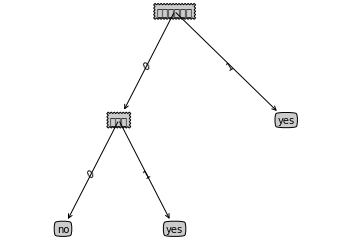

In [10]:
"""
Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    nodeType - 结点格式
Returns:
    无
"""
# 函数说明:绘制结点
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                      #定义箭头格式
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',#绘制结点
        xytext=centerPt, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

"""
Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注的内容
Returns:
    无
"""
# 函数说明:标注有向边属性值
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]#计算标注位置                   
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

"""
Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
Returns:
    无
"""
# 函数说明:绘制决策树
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                   #设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")                                         #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                       #获取决策树叶结点数目，
                                                                                        #决定了树的宽度
    depth = getTreeDepth(myTree)                                                         #获取决策树层数
    firstStr = next(iter(myTree))                                                        #下个字典                                                 
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)#中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                               #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                   #绘制结点
    secondDict = myTree[firstStr]                                                        #下一个字典，
                                                                                         #也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                  #y偏移
    for key in secondDict.keys():                               
        if type(secondDict[key]).__name__=='dict':                                       #测试该结点是否为字典，
                                                                                         #如果不是字典，
                                                                                        #代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))                                    #不是叶结点，
                                                                                        #递归调用继续绘制
        else:                                                                            #如果是叶结点，绘制叶结点，
                                                                                         #并标注有向边属性值                                             
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

"""
Parameters:
    inTree - 决策树(字典)
Returns:
    无
"""
# 函数说明:创建绘制面板
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')                     #创建fig
    fig.clf()                                                  #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))               #获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))              #获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0; #x偏移
    plotTree(inTree, (0.5,1.0), '')                            #绘制决策树
    plt.show()                                                 #显示绘制结果     



dataSet, labels = createDataSet()
featLabels = []
myTree = createTree(dataSet, labels, featLabels)
print(myTree)  
createPlot(myTree) #画图就是给自己看个明白 无需细究 知道如何使用就好

In [12]:
#依靠训练数据构造了决策树之后，可以将它用于实际数据的分类。在执行数据分类时，需要决策树以及用于构造树的标签向量；
#然后，程序比较测试数据与决策树上的数值，递归执行该过程直到进入叶子结点；最后将测试数据定义为叶子结点所属的类型

# 在构建决策树的代码，可以看到，有个featLabels参数。它是用来记录各个分类结点的，在用决策树做预测的时候，
# 按顺序输入需要的分类结点的属性值即可。举个例子，比如用上述已经训练好的决策树做分类，
# 只需要提供这个人是否有房子，是否有工作这两个信息即可，无需提供其他冗余的信息。

"""
Parameters:
    inputTree - 已经生成的决策树
    featLabels - 存储选择的最优特征标签
    testVec - 测试数据列表，顺序对应最优特征标签
Returns:
    classLabel - 分类结果
"""
# 函数说明:使用决策树分类
def classify(inputTree, featLabels, testVec):
    firstStr = next(iter(inputTree))    #获取决策树结点 对应的分类标签
    print(firstStr)
    secondDict = inputTree[firstStr]      #下一个字典
    print(secondDict)
    featIndex = featLabels.index(firstStr)   #找出标签所在的索引                                           
    for key in secondDict.keys():
        if testVec[featIndex] == key: #同样索引时候 测试数据如果吻合字典的键
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec) #主要是myTree这个奇葩字典需要仔细理解
            else: classLabel = secondDict[key] #下一层不是字典 之间把值赋给classLabel 也就是yes或者no
    return classLabel



dataSet, labels = createDataSet()
featLabels = []
myTree = createTree(dataSet, labels, featLabels)
testVec = [0,1]#测试数据
result = classify(myTree, featLabels, testVec)
if result == 'yes':
    print('放贷')
if result == 'no':
    print('不放贷')

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
有自己的房子
{0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}
有工作
{0: 'no', 1: 'yes'}
放贷


In [13]:
# 构造决策树是很耗时的任务，即使处理很小的数据集，如前面的样本数据，也要花费几秒的时间，
# 如果数据集很大，将会耗费很多计算时间。然而用创建好的决策树解决分类问题，则可以很快完成。
# 因此，为了节省计算时间，最好能够在每次执行分类时调用已经构造好的决策树

# 为了解决这个问题，需要使用Python模块pickle序列化对象。
# 序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。
# 假设我们已经得到决策树
# {‘有自己的房子’: {0: {‘有工作’: {0: ‘no’, 1: ‘yes’}}, 1: ‘yes’}}，使用pickle.dump存储决策树

import pickle

# pickle提供了一个简单的持久化功能。可以将对象以文件的形式存放在磁盘上。
# pickle模块只能在python中使用，python中几乎所有的数据类型（列表，字典，集合，类等）都可以用pickle来序列化

"""
Parameters:
    inputTree - 已经生成的决策树
    filename - 决策树的存储文件名
Returns:
    无
"""
# 函数说明:存储决策树
def storeTree(inputTree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)



myTree = {'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}
storeTree(myTree, 'classifierStorage.txt')

In [14]:
#运行代码，在该Python文件的相同目录下，会生成一个名为classifierStorage.txt的txt文件，
#这个是个二进制存储的文件，会生成即可，下次使用的时候

"""
Parameters:
    filename - 决策树的存储文件名
Returns:
    pickle.load(fr) - 决策树字典
"""
# 函数说明:读取决策树
def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)



myTree = grabTree('classifierStorage.txt')
print(myTree)

{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


In [ ]:
# 至此决策树的基本原理已经介绍完毕，要说明的是，以上介绍的只是决策树当中的ID3算法，在ID3算法提出之后，
# 相继又提出了C4.5算法和CART，与ID3算法不同的是，C4.5算法采用的特征选择指标是信息增益率而不是信息增益，
# 其他原理同ID3相同。实际上信息增益率的计算方法也相当简单，就是信息增益与特征的熵的比值；
# 而CART（Class and Regression Tree）从名字看出来即可做分类又可做回归，与ID3不同的是，作为分类树时，
# 其选择划分节点的特征的依据是基尼系数，选择使得划分后数据集基尼系数最小的那个特征作为节点的划分的特征。
# 如果是构建回归树，则划分节点的特征的选择是依据划分后子节点的方差，我们尽可能选择使得方差最小的划分特征，
# 我们往往使用启发式的方式来搜索划分特征以及划分特征的值，即依次遍历各个维度的特征，当遍历到当前维度特征时，
# 依次遍历当前特征的所有值作为划分值从而选出使得子节点方差最小的划分特征以及特征的值。


# 决策树学习本质上是从训练数据集中归纳出一组分类规则。
# 与训练数据集不相矛盾的决策树（即能对训练数据进行正确分类的决策树）可能有多个，也可能一个也没有。
# 我们需要的是一个与训练数据矛盾较小的决策树，同时具有很好的泛化能力。
# 从另一个角度看，决策树学习是由训练数据集估计条件概率模型。
# 基于特征空间划分的类的条件概率模型有无穷多个，我们选择的条件概率模型
# 应该不仅对训练数据有很好的拟合，而且对未知数据有很好的预测

